In [1]:
import serial
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib notebook


def read_arduino(ser,inputBufferSize):
#    data = ser.readline(inputBufferSize)
    data = ser.read(inputBufferSize)
    out =[(int(data[i])) for i in range(0,len(data))]
    return out

def process_data(data):
    data_in = np.array(data)
    result = []
    i = 1
    while i < len(data_in)-1:
        if data_in[i] > 127:
            # Found beginning of frame
            # Extract one sample from 2 bytes
            intout = (np.bitwise_and(data_in[i],127))*128
            i = i + 1
            intout = intout + data_in[i]
            result = np.append(result,intout)
        i=i+1
    return result

In [7]:
def some_function(input):
    output = 10*input
    return output

In [12]:
test = some_function(50)
print(test)
#np.fft(test)
test_array = np.linspace(0,100,10)
test_array[0]

500


0.0

In [2]:
# Read example data
baudrate = 230400
cport = 'COM4'  # set the correct port before you run it
#cport = '/dev/tty.usbmodem141101'  # set the correct port before run it
ser = serial.Serial(port=cport, baudrate=baudrate)    
# take example data
inputBufferSize = 10000 # 20000 = 1 second
ser.timeout = inputBufferSize/20000.0  # set read timeout
ser.set_buffer_size(rx_size = inputBufferSize)
data = read_arduino(ser,inputBufferSize)
data_plot = process_data(data)
plt.figure()
plt.plot(data_plot)
plt.show()
 

SerialException: could not open port 'COM4': PermissionError(13, 'Access is denied.', None, 5)

<IPython.core.display.Javascript object>


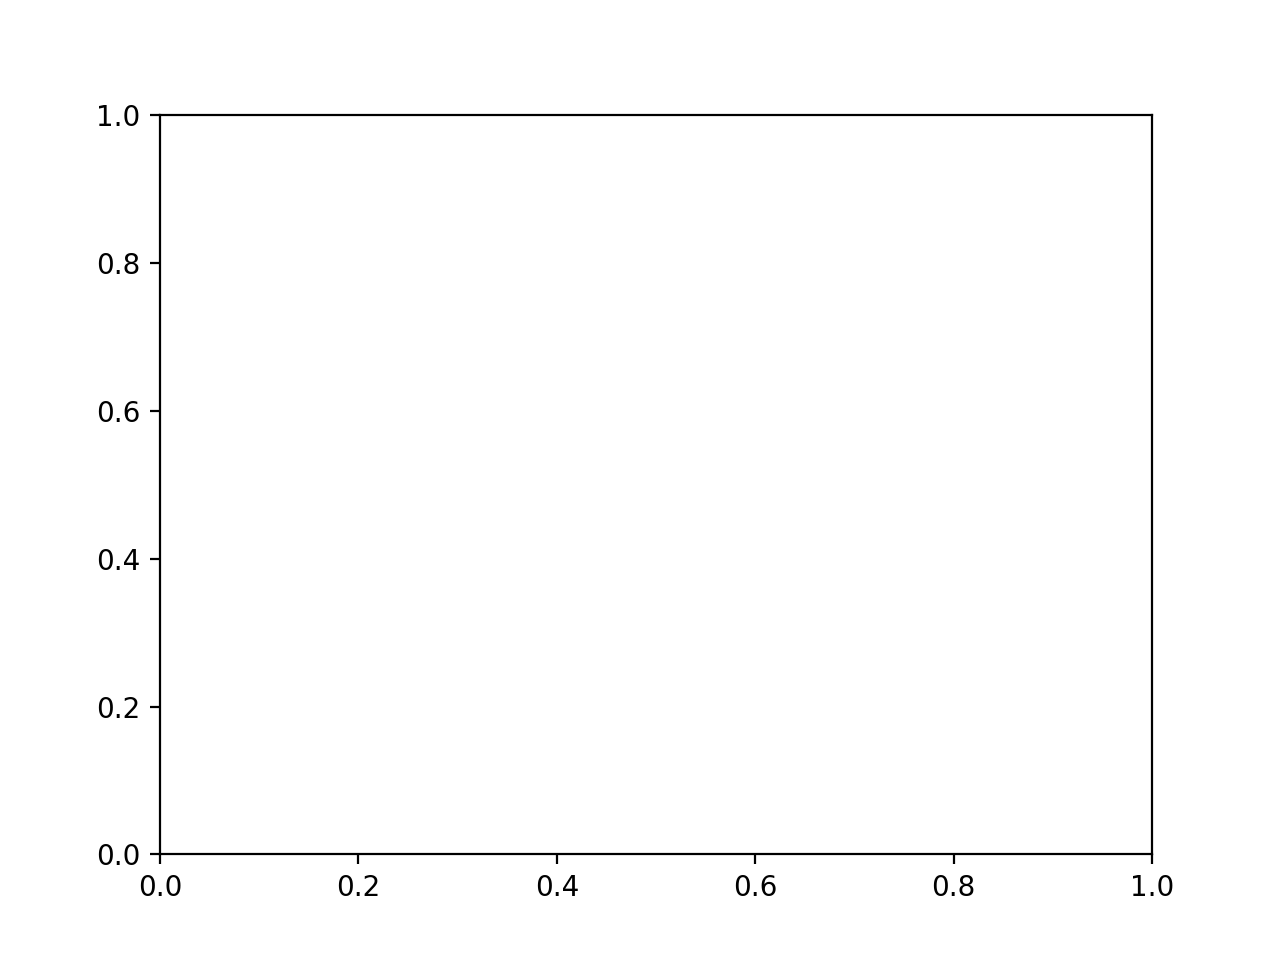

In [8]:
# Read data
baudrate = 230400
cport = 'COM4'  # set the correct port before you run it
#cport = '/dev/tty.usbmodem141101'  # set the correct port before run it
ser = serial.Serial(port=cport, baudrate=baudrate)    # this initializes the animated plot
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()


<IPython.core.display.Javascript object>


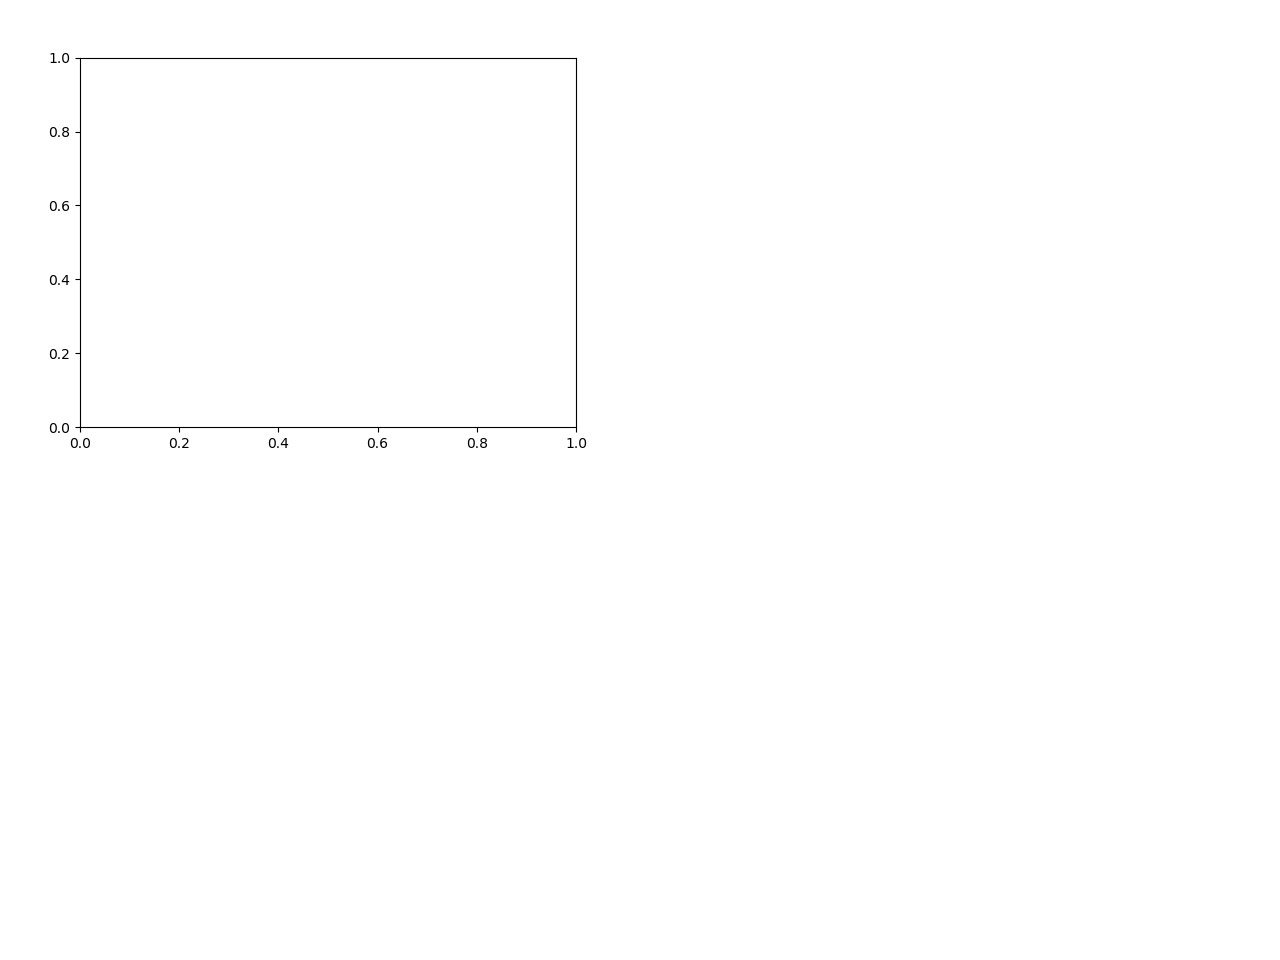

In [3]:
# this initializes the animated plot
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()



<IPython.core.display.Javascript object>


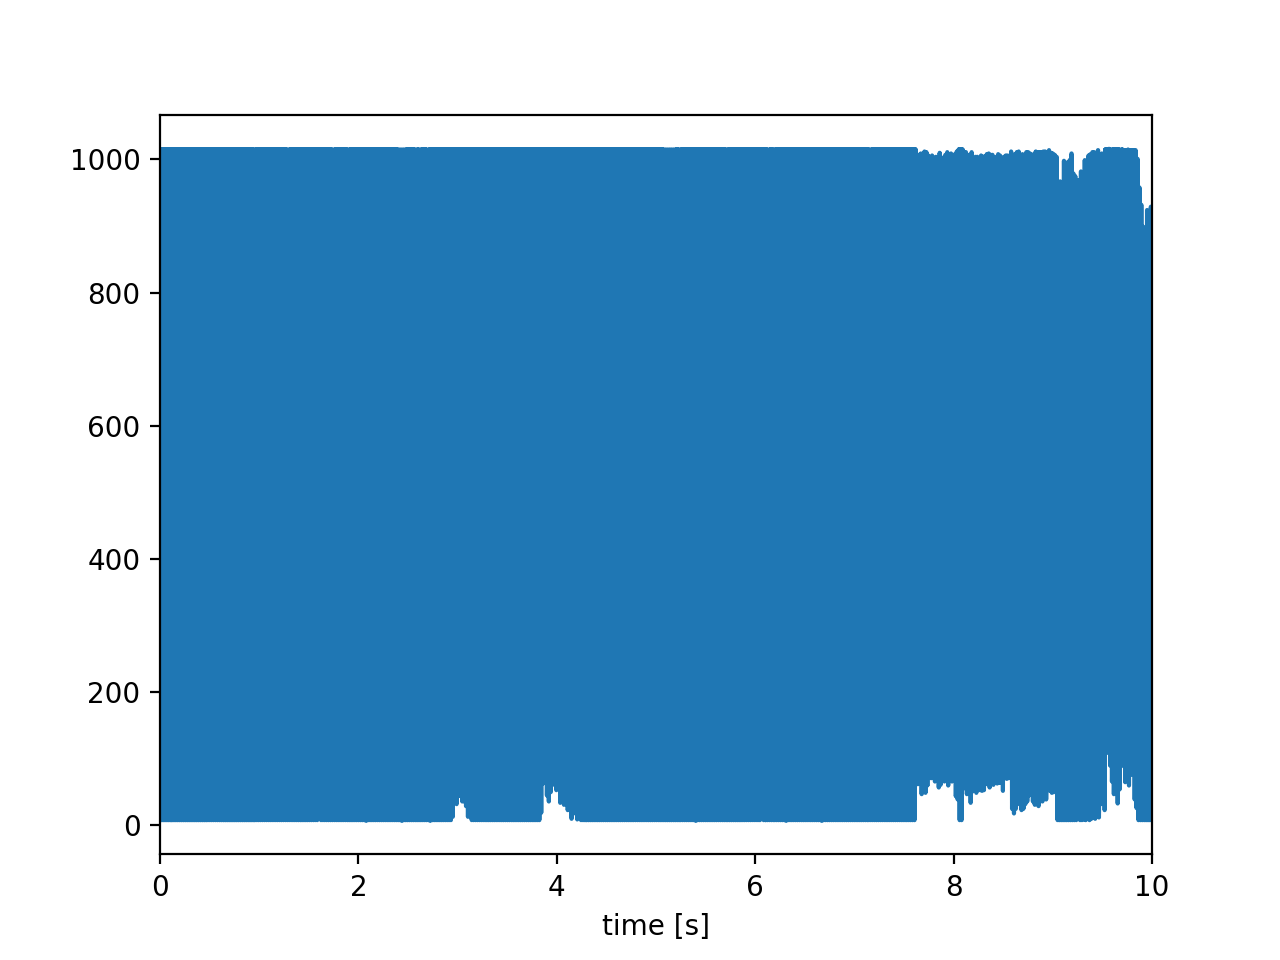

In [10]:
# take continuous data stream 
import numpy as np
inputBufferSize = 10000 # keep betweein 2000-20000
ser.timeout = inputBufferSize/20000.0  # set read timeout, 20000 is one second
ser.set_buffer_size(rx_size = inputBufferSize)

%matplotlib notebook

total_time = 20.0; # time in seconds [[1 s = 20000 buffer size]]
max_time = 10.0; # time plotted in window [s]
N_loops = 20000.0/inputBufferSize*total_time

T_acquire = inputBufferSize/20000.0    # length of time that data is acquired for 
N_max_loops = max_time/T_acquire    # total number of loops to cover desire time window

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
plt.ion()
fig.show()
fig.canvas.draw()

for k in range(0,int(N_loops)):
    data = read_arduino(ser,inputBufferSize)
    data_temp = process_data(data)
    if k <= N_max_loops:
        if k==0:
            data_plot = data_temp
        else:
            data_plot = np.append(data_temp,data_plot)
        t = (min(k+1,N_max_loops))*inputBufferSize/20000.0*np.linspace(0,1,(data_plot).size)
    else:
        data_plot = np.roll(data_plot,len(data_temp))
        data_plot[0:len(data_temp)] = data_temp
    t = (min(k+1,N_max_loops))*inputBufferSize/20000.0*np.linspace(0,1,(data_plot).size)

    

    #plt.xlim([0,max_time])
    ax1.clear()
    ax1.set_xlim(0, max_time)
    plt.xlabel('time [s]')
    ax1.plot(t,data_plot)
    fig.canvas.draw()    
    plt.show()

<IPython.core.display.Javascript object>


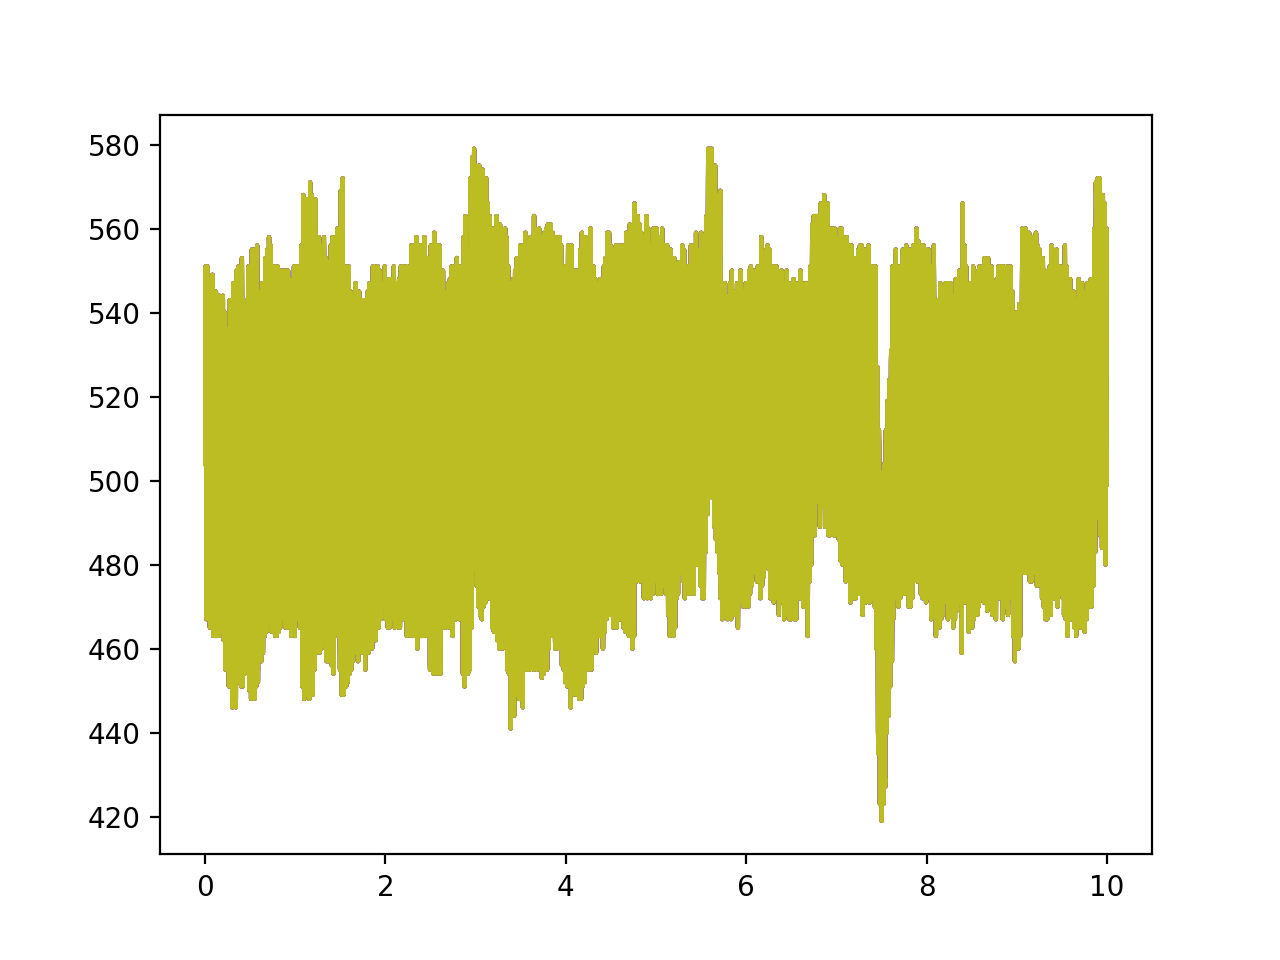

IndexError: index 2 is out of bounds for axis 1 with size 2

In [36]:
# save the plot above when ready
name_of_file = 'example_file.txt'
np.savetxt(name_of_file, np.c_[t, np.real(data_plot)])

# load the above if needed
temp = np.loadtxt(name_of_file)
plt.figure()

plt.plot(temp[:,0],temp[:,1])
plt.plot(temp[:,2],temp[:,3])
plt.show()

In [8]:
# close serial port if necessary
if ser.read():
    ser.flushInput()
    ser.flushOutput()
    ser.close()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
name_of_file = 'example_file.txt'
data = np.loadtxt(name_of_file)
print(data)

[[0.00000000e+00 5.04000000e+02]
 [9.52589615e-05 5.04000000e+02]
 [1.90517923e-04 5.05000000e+02]
 ...
 [9.99980948e+00 5.02000000e+02]
 [9.99990474e+00 4.99000000e+02]
 [1.00000000e+01 4.99000000e+02]]


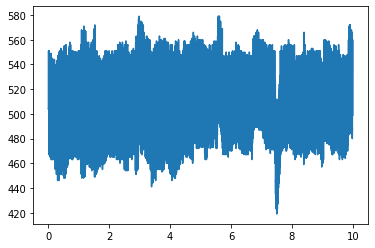

In [6]:
plt.plot(data[:,0], data[:,1])
plt.show()

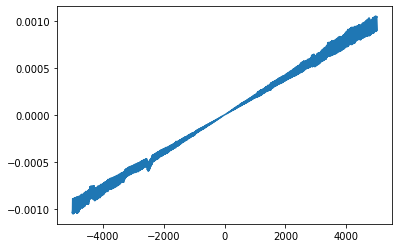

[0.00000000e+00 9.52589615e-05 1.90517923e-04 ... 9.99980948e+00
 9.99990474e+00 1.00000000e+01]


In [7]:
import array as arr
from numpy.fft import *
t = data[:,0]
signal = data[:,1]

fs=10000
nfft = len(t)

 
X = np.fft.fftfreq(nfft,signal) 
X = np.fft.fftshift(X)

f = np.linspace(-nfft/2,nfft/2-1,len(X))*fs/nfft

plt.plot(f, X)
plt.show()

X[np.absolute(f)>15] = 0

X = np.fft.ifftshift(X)
X = np.fft.ifft(X)

#a = arr.array('i',[-3, 1, 3])
#print(np.absolute(a))

print(t)
#plt.plot(t, X)
#plt.show()